In [3]:
import pandas as pd 

In [4]:
df=pd.read_csv("C:\\Users\\saipr\\calories_burnt_prediction\\data\\calories.csv")

In [5]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [4]:
df.shape

(15000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
df.select_dtypes(include='number').columns

Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [7]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [8]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
df.describe(include='object')

,Gender
count,15000
unique,2
top,female
freq,7553


In [11]:
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
#User_ID is not necessary
df.drop('User_ID',axis=1,inplace=True)

In [13]:
print(df.duplicated().sum())

1


## Exploratory Data Analysis

In [14]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

<module 'matplotlib.pyplot' from 'c:\\Users\\saipr\\calories_burnt_prediction\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

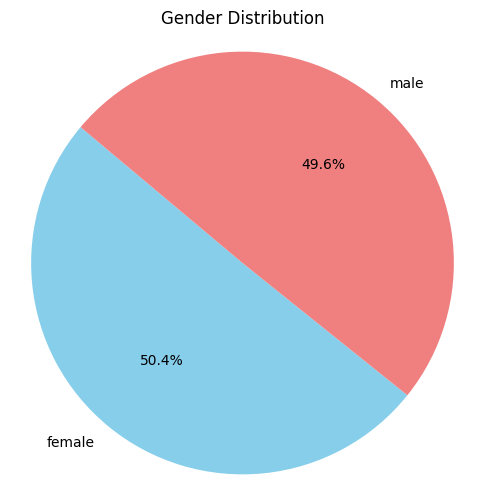

In [15]:
import matplotlib.pyplot as plt

indexx = df['Gender'].value_counts().index
valuess = df['Gender'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(valuess, labels=indexx, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')  
plt


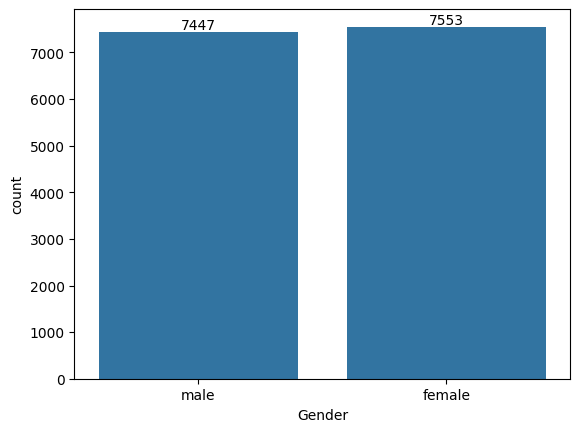

In [16]:
import seaborn as sns
ax=sns.countplot(x=df['Gender'])
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Calories', ylabel='Count'>

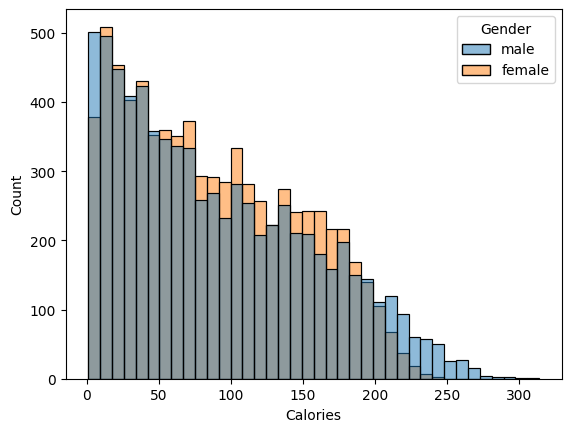

In [17]:
sns.histplot(x=df['Calories'],hue=df['Gender'])

In [18]:
df_male=df[df['Gender']=='male']
df_female=df[df['Gender']=='female']

C:\Users\saipr\AppData\Local\Temp\ipykernel_33736\1695624848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_male['Calories'],color='red')


<Axes: ylabel='Density'>

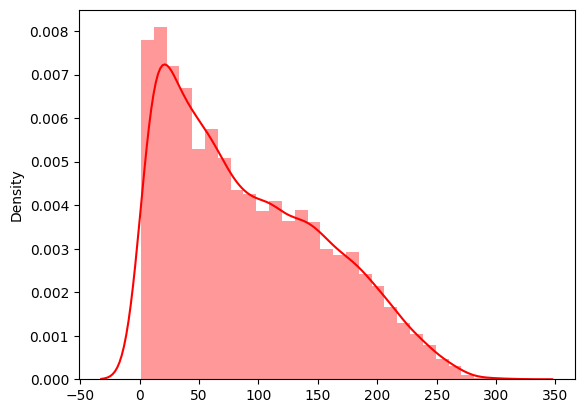

In [19]:
sns.distplot(x=df_male['Calories'],color='red')


<Axes: ylabel='Density'>

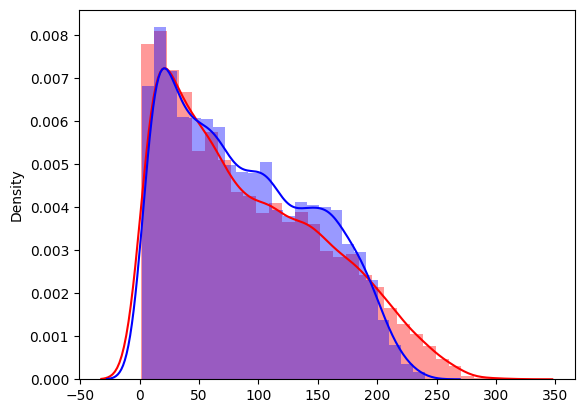

In [20]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(x=df_male['Calories'],color='red')
sns.distplot(x=df_female['Calories'],color='blue')

In [21]:
import pandas as pd
from scipy.stats import ttest_ind


male_calories = df[df['Gender'] == 'male']['Calories']
female_calories = df[df['Gender'] == 'female']['Calories']

t_stat, p_val = ttest_ind(male_calories, female_calories, equal_var=False)

print(f"T-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically significant difference in Calories between Male and Female.")
else:
    print("❌ No statistically significant difference in Calories between Male and Female.")


T-test Results:
T-statistic: 2.7364
P-value: 0.0062
✅ Statistically significant difference in Calories between Male and Female.


"There is a statistically significant difference in calorie consumption between males and females. With a p-value of 0.0062, we reject the null hypothesis and conclude that gender has a meaningful effect on calorie intake in this dataset."



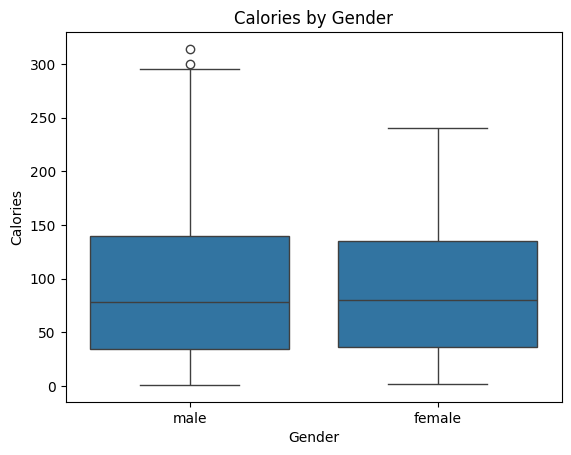

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Gender', y='Calories', data=df)
plt.title("Calories by Gender")
plt.show()


In [23]:
from scipy.stats import mannwhitneyu

stat, p_val = mannwhitneyu(male_calories, female_calories, alternative='two-sided')

print(f"Mann-Whitney U Test:")
print(f"U-statistic: {stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically significant difference in Calories between Male and Female.")
else:
    print("❌ No statistically significant difference in Calories between Male and Female.")


Mann-Whitney U Test:
U-statistic: 28189459.0000
P-value: 0.8038
❌ No statistically significant difference in Calories between Male and Female.


There is no statistically significant difference in calorie intake between males and females.
With a p-value of 0.8038, we do not have enough evidence to claim that gender affects calorie consumption. The result suggests that any observed difference in calorie intake between the two groups is likely due to random chance.



## 3. Interpretation of Results:


T-test Results (p-value = 0.0062):
Statistically significant (p < 0.05): The T-test result suggested that there was a real difference between Male and Female calorie means.

This indicates that the average calorie intake differs between the two groups, which was a strong conclusion from the T-test.

Mann-Whitney U Test Results (p-value = 0.8038):
Not statistically significant (p > 0.05): The Mann-Whitney U test, however, indicated that there was no significant difference between the two groups when looking at their distributions and ranks.

This result suggests that when you consider the entire distribution (not just the means), there isn't enough evidence to claim that one group tends to consume more or less calories than the other.



In [24]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


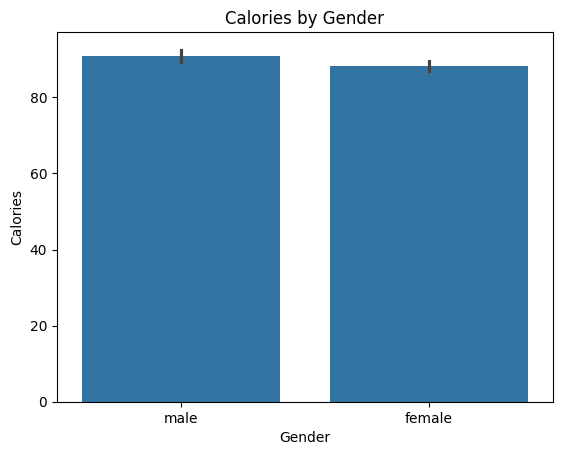

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Gender', y='Calories', data=df)
plt.title("Calories by Gender")
plt.show()


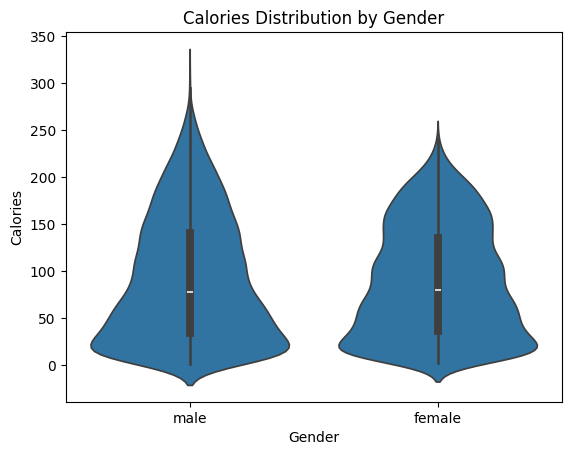

In [26]:
sns.violinplot(x='Gender', y='Calories', data=df)
plt.title("Calories Distribution by Gender")
plt.show()


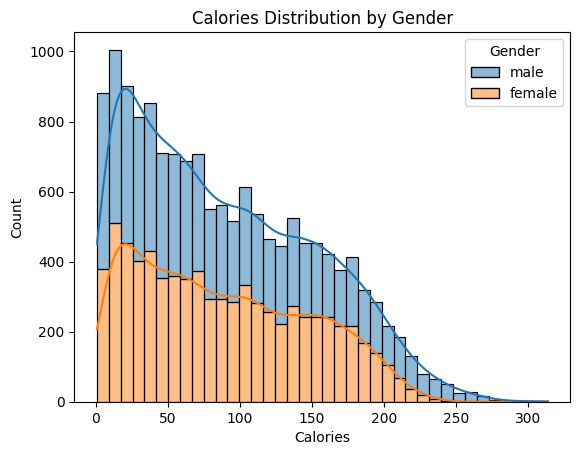

In [27]:
sns.histplot(data=df, x='Calories', hue='Gender', multiple='stack', kde=True)
plt.title("Calories Distribution by Gender")
plt.show()


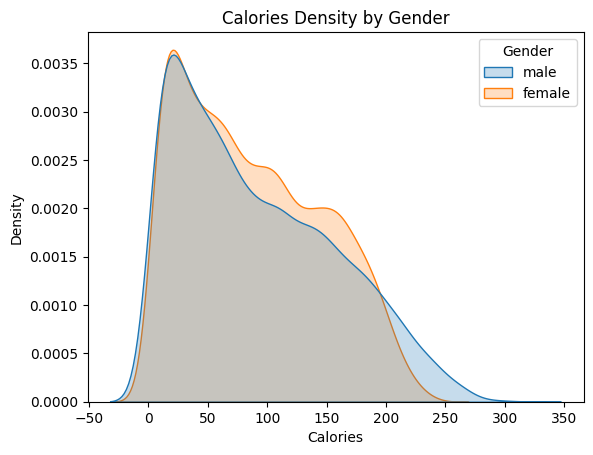

In [28]:
sns.kdeplot(data=df, x='Calories', hue='Gender', fill=True)
plt.title("Calories Density by Gender")
plt.show()


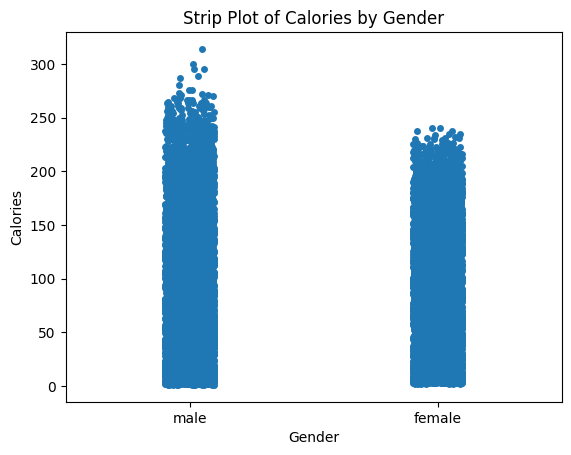

In [29]:
sns.stripplot(x='Gender', y='Calories', data=df, jitter=True)
plt.title("Strip Plot of Calories by Gender")
plt.show()


In [30]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


Calories

In [31]:
df['Calories'].describe()

count    15000.000000
mean        89.539533
std         62.456978
min          1.000000
25%         35.000000
50%         79.000000
75%        138.000000
max        314.000000
Name: Calories, dtype: float64

<Axes: ylabel='Density'>

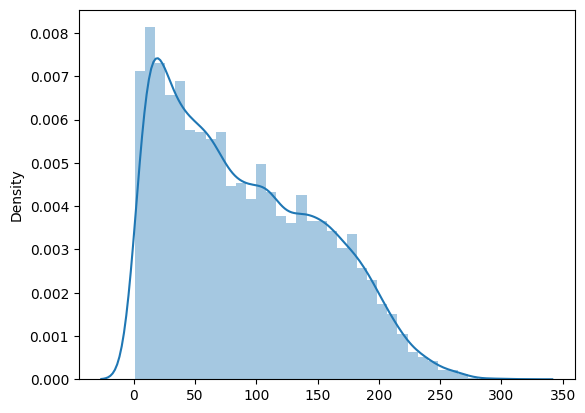

In [32]:
sns.distplot(x=df['Calories'])

<Axes: xlabel='Calories', ylabel='Count'>

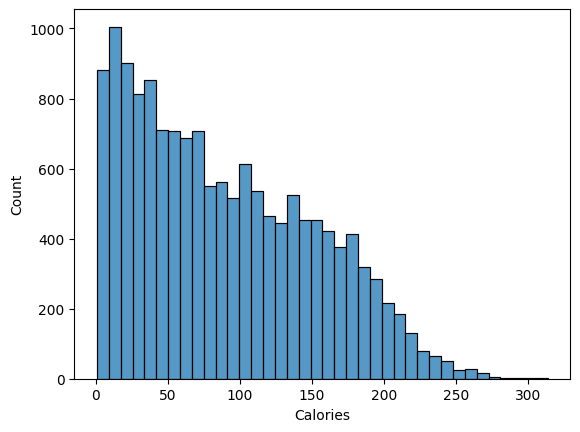

In [33]:
sns.histplot(x=df['Calories'])

<Axes: xlabel='Calories'>

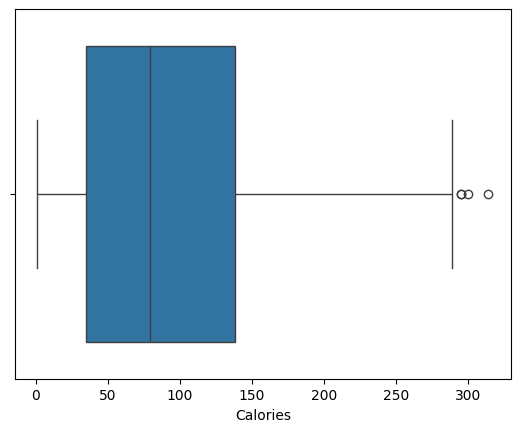

In [34]:
sns.boxplot(x=df['Calories'])

In [35]:
df['Calories'].skew()

np.float64(0.5053713740451047)

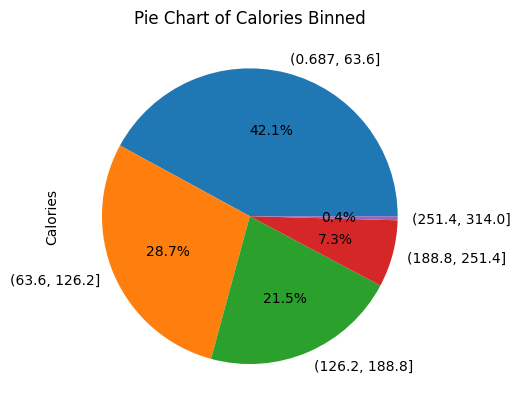

In [36]:
bins = pd.cut(df['Calories'], bins=5)  
df['Calories'].groupby(bins).count().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pie Chart of Calories Binned")
plt.show()


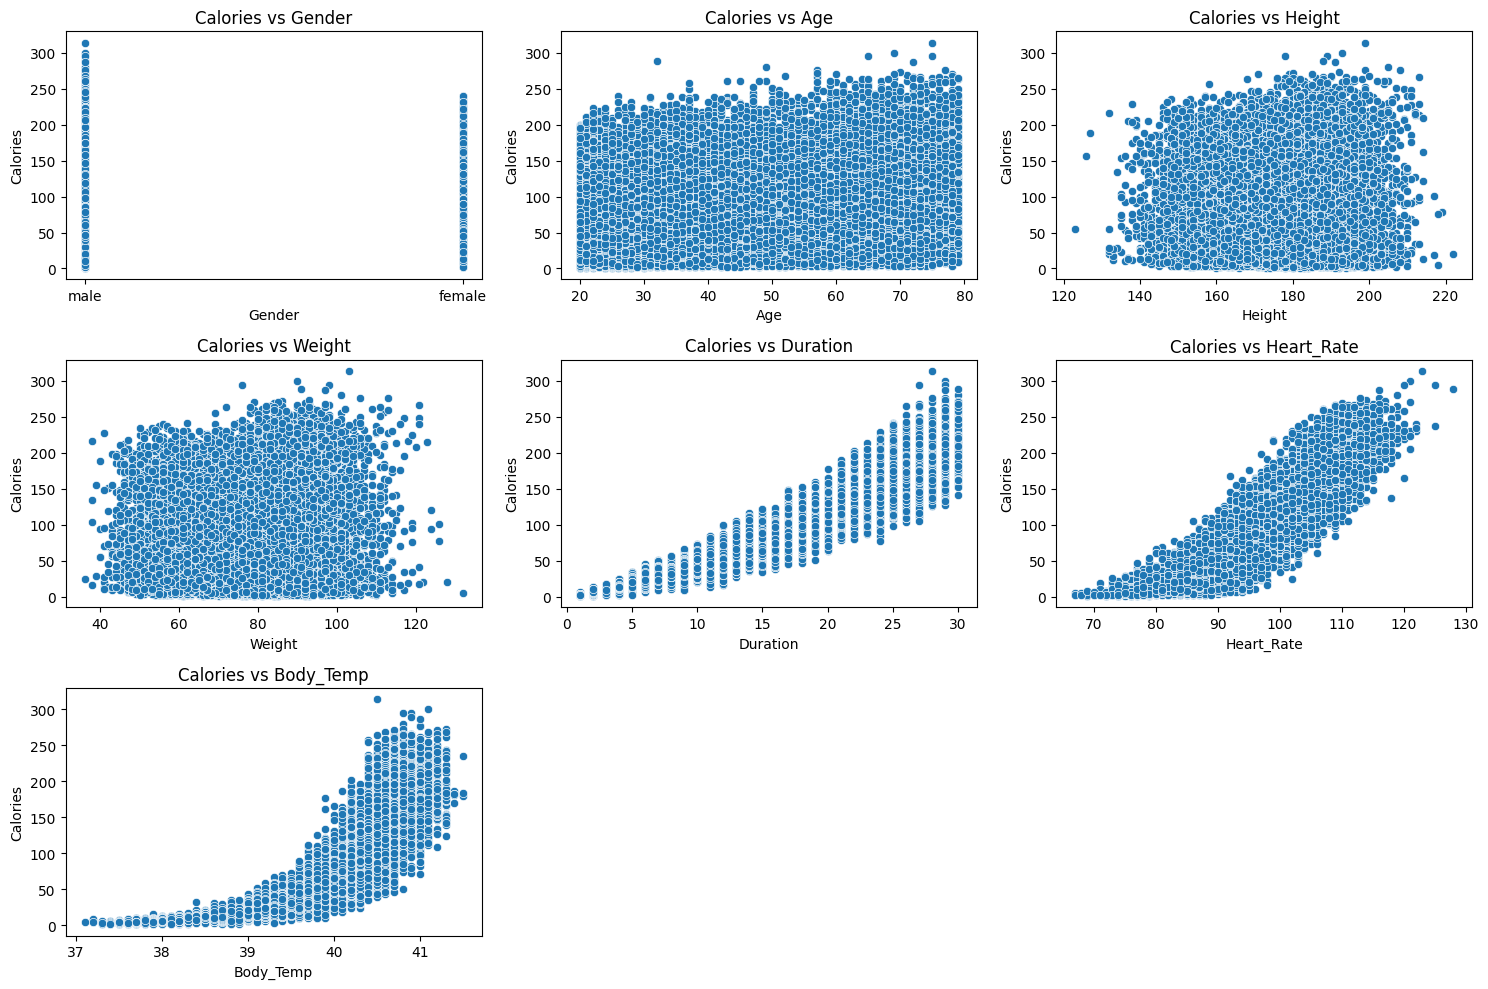

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df.columns[df.columns != 'Calories']

num_features = len(features)

fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, (num_features // 3) * 5))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['Calories'], ax=axes[i])
    axes[i].set_title(f"Calories vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Calories")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [38]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

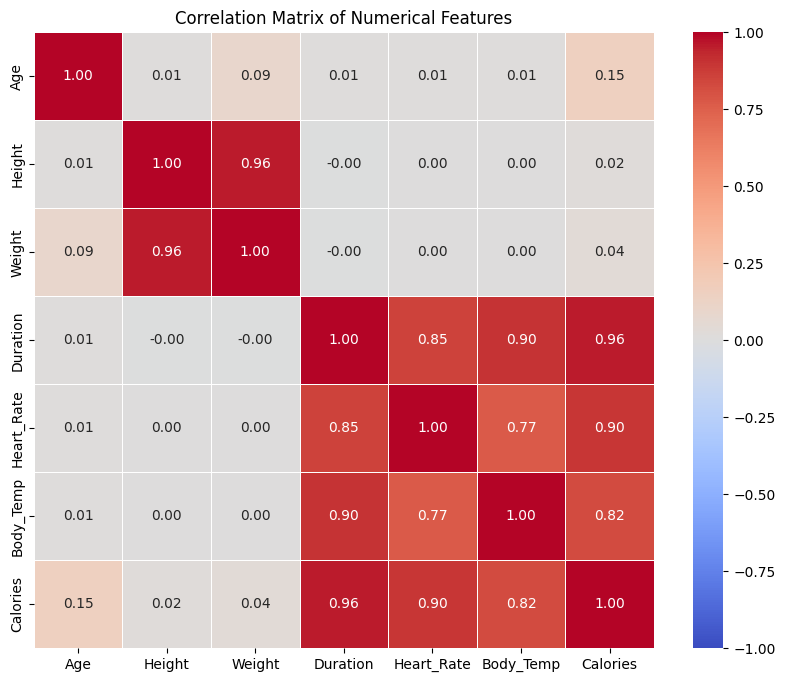

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

# Compute the correlation matrix for the numerical features
correlation_matrix = df[numerical_features].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [40]:
df.select_dtypes(include='number').corrwith(df['Calories'])


Age           0.154395
Height        0.017537
Weight        0.035481
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Calories      1.000000
dtype: float64

Key Takeaways:

Strongest Influences on Calories: Duration, Heart Rate, and Body Temperature are the most significant factors influencing calorie consumption in this dataset.

Minimal Influence: Age, Height, and Weight have very weak correlations with Calories, suggesting these variables don't contribute much to explaining variations in calorie consumption.

Age

In [41]:
df['Age'].describe()

count    15000.000000
mean        42.789800
std         16.980264
min         20.000000
25%         28.000000
50%         39.000000
75%         56.000000
max         79.000000
Name: Age, dtype: float64

<Axes: ylabel='Density'>

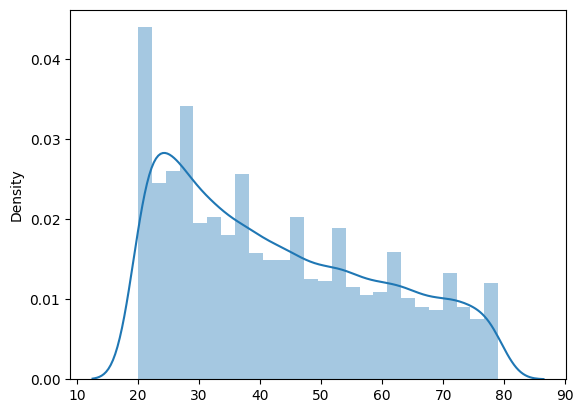

In [42]:
sns.distplot(x=df['Age'])

<Axes: xlabel='Age'>

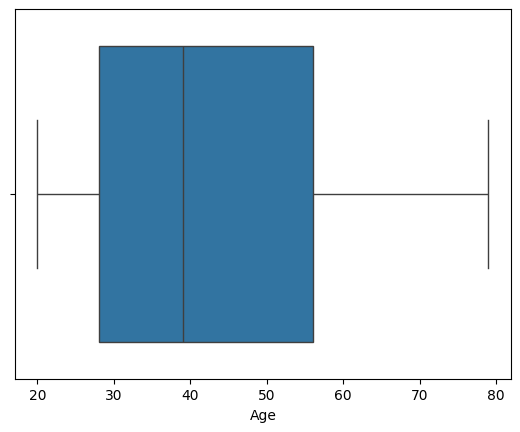

In [43]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Age', ylabel='Calories'>

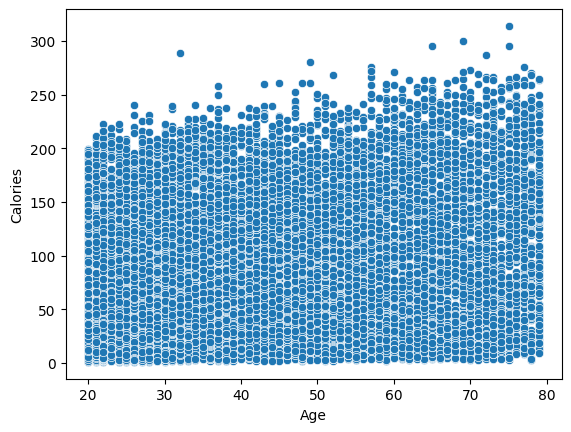

In [44]:
sns.scatterplot(x=df['Age'],y=df['Calories'])

In [45]:
from scipy import stats

statistic, p_value = stats.shapiro(df['Age'])

print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("The data is likely normally distributed (Fail to Reject H0)")
else:
    print("The data is likely not normally distributed (Reject H0)")


Shapiro-Wilk Test Statistic: 0.9328687820110189
P-value: 1.349945471019691e-62
The data is likely not normally distributed (Reject H0)


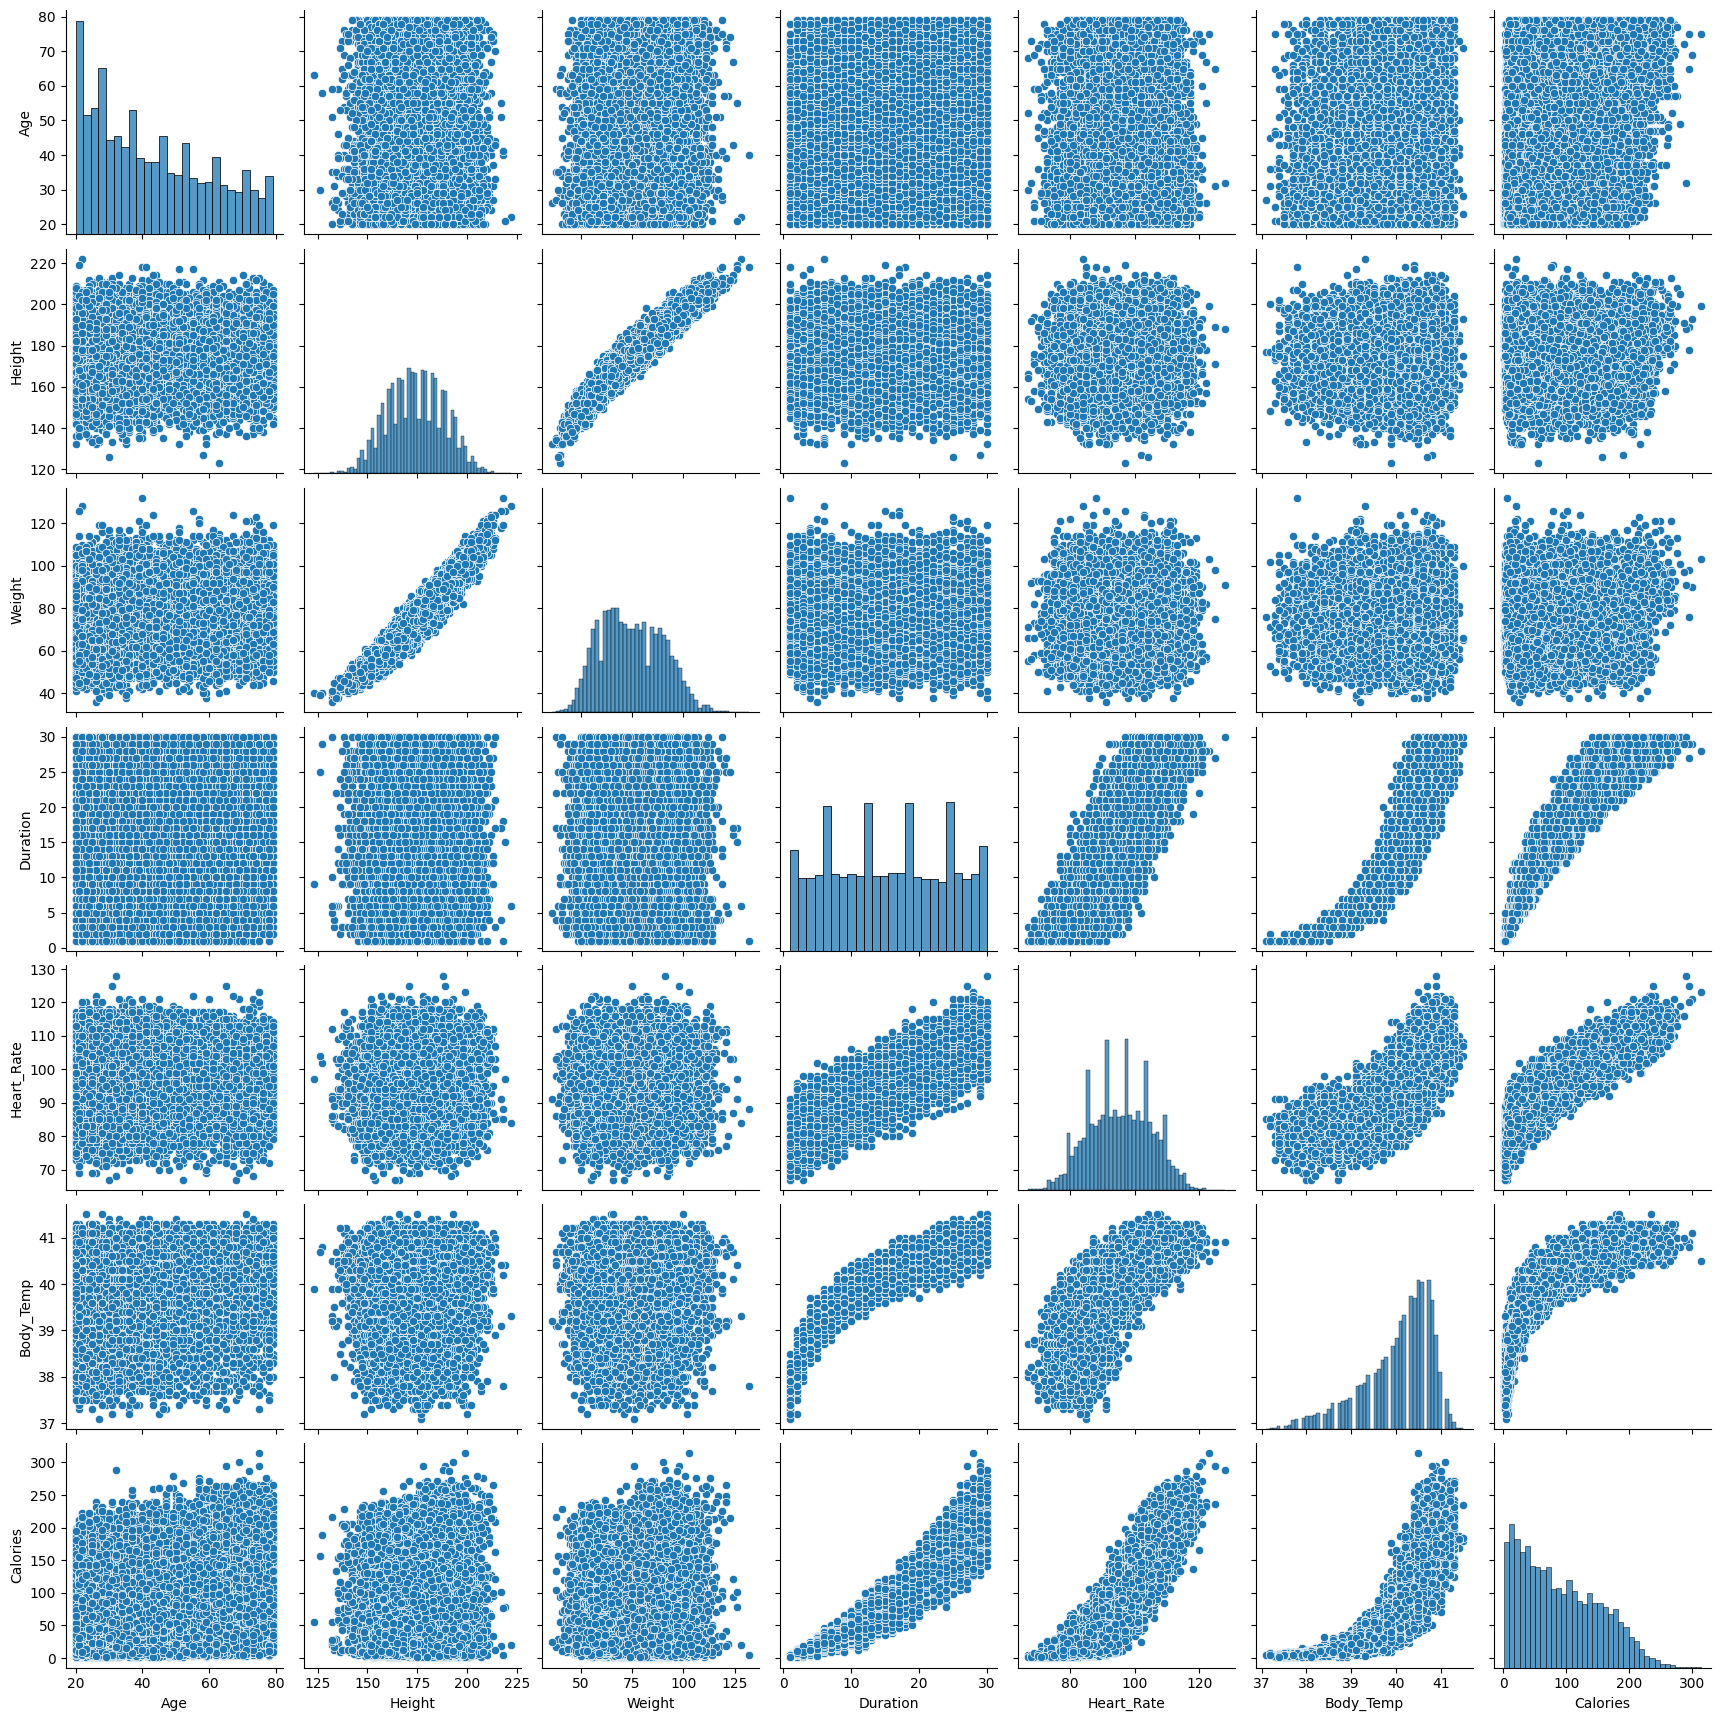

In [46]:
sns.pairplot(df)

In [47]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [48]:
df['Gender']=df['Gender'].map({'male':1,'female':0})

In [49]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0


<Axes: >

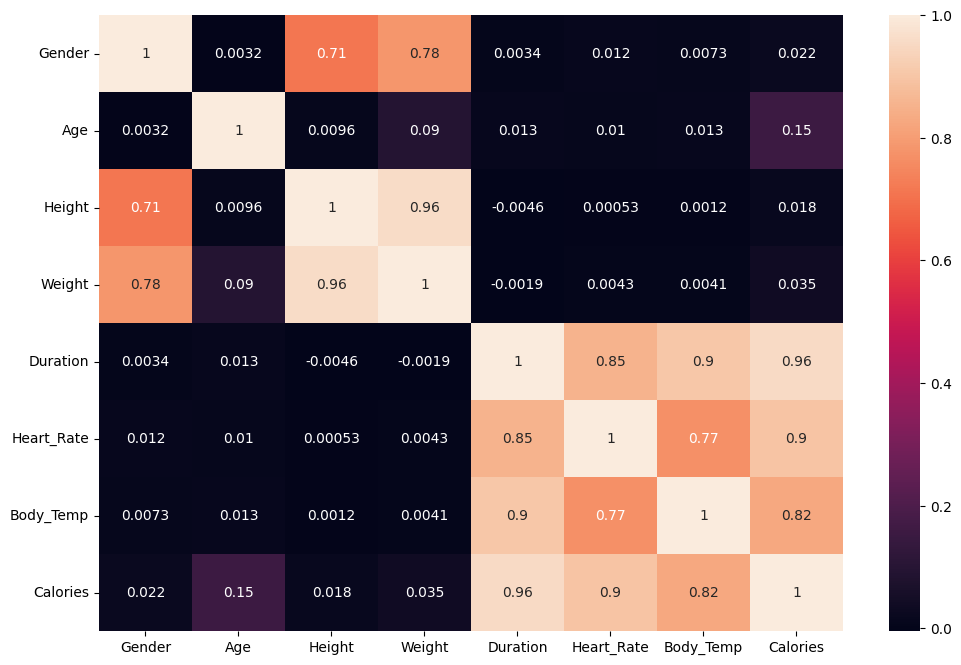

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [51]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0


Height

<Axes: ylabel='Density'>

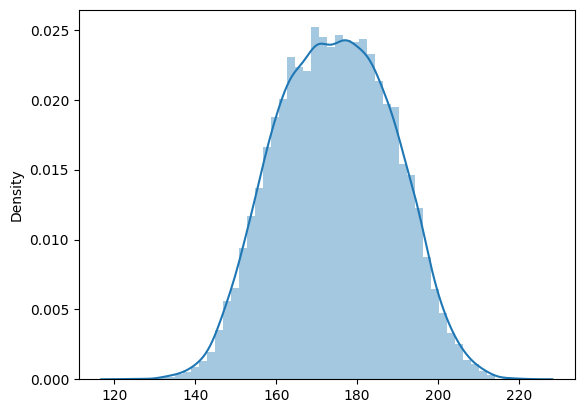

In [52]:
sns.distplot(x=df['Height'])

In [53]:
df['Height'].skew()

np.float64(-0.006189620437893538)

In [54]:
from scipy import stats

statistic, p_value = stats.shapiro(df['Height'])

print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("The data is likely normally distributed (Fail to Reject H0)")
else:
    print("The data is likely not normally distributed (Reject H0)")


Shapiro-Wilk Test Statistic: 0.9951683482010479
P-value: 7.235569956401361e-22
The data is likely not normally distributed (Reject H0)


Yes — despite having low skewness, the Shapiro-Wilk test p-value is extremely low, so:

❌ The data is likely not normally distributed (Reject H₀).

In [55]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [56]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

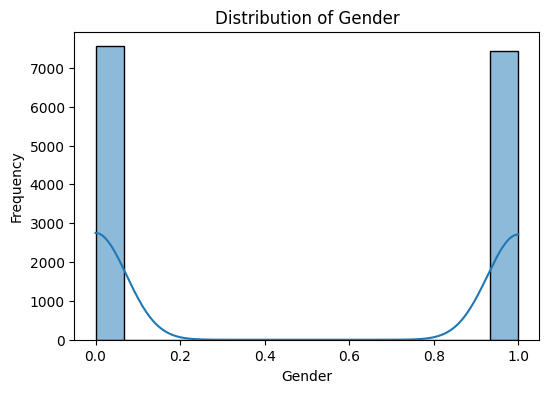

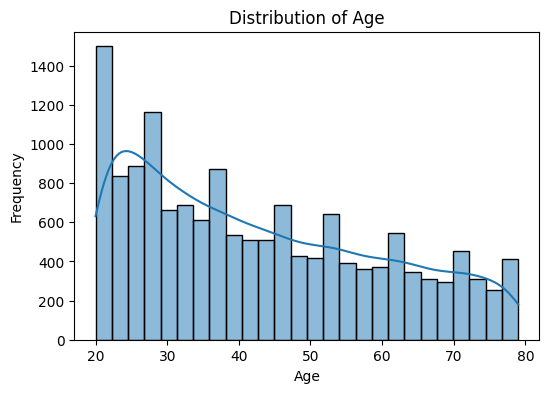

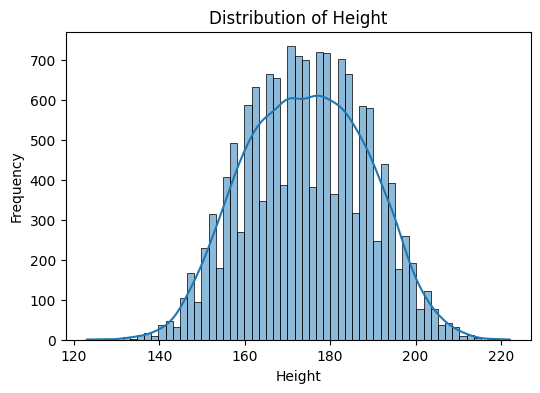

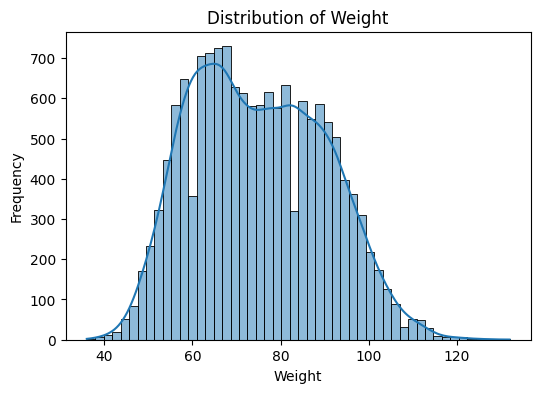

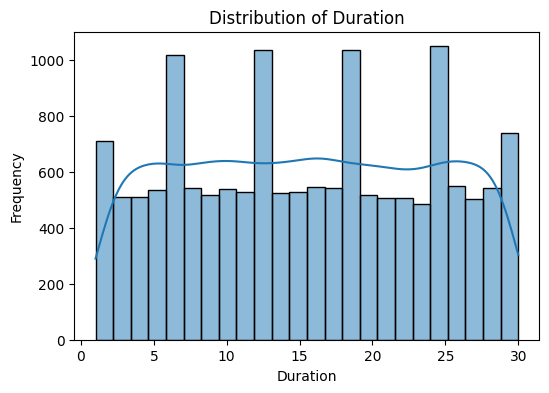

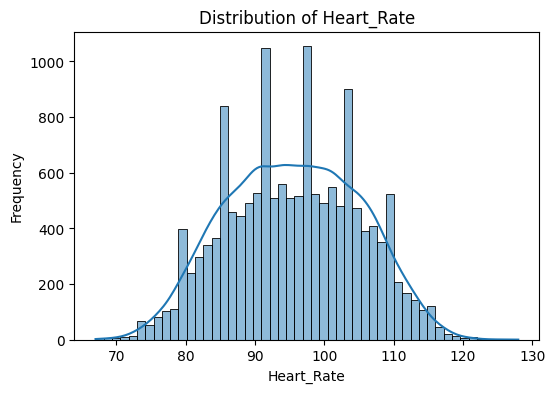

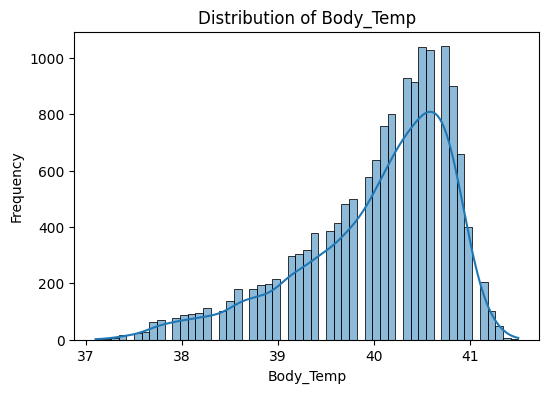

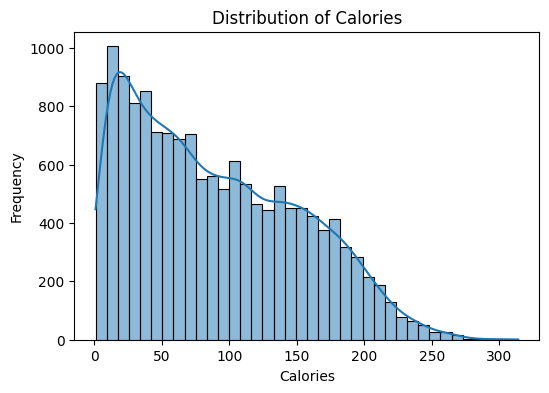

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

col = ['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories']

for i in col:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()


In [60]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df.drop('Calories',axis=1)
y=df['Calories']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=42)

In [63]:
!pip install mlflow

  Using cached mlflow-2.21.3-py3-none-any.whl.metadata (30 kB)
  Using cached mlflow_skinny-2.21.3-py3-none-any.whl.metadata (31 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached alembic-1.15.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached pyarrow-19.0.1-cp310-cp310-win_amd64.whl.metadata (3.4 kB)
  Using cached sqlalchemy-2.0.40-cp310-cp310-win_amd64.whl.metadata (9.9 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires altair<6,>=4.0, which is not installed.
streamlit 1.37.1 requires pydeck<1,>=0.8.0b4, which is not installed.
streamlit 1.37.1 requires rich<14,>=10.14.0, which is not installed.
streamlit 1.37.1 requires tenacity<9,>=8.1.0, which is not installed.
streamlit 1.37.1 requires toml<2,>=0.10.1, which is not installed.
streamlit 1.37.1 requires watchdog<5,>=2.1.5; platform_system != "Darwin", which is not installed.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.2.1 which is incompatible.


In [65]:
import mlflow
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Calories_Prediction")

with mlflow.start_run():
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_param("test_size", 0.23)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    mlflow.sklearn.log_model(model, "linear_regression_model")

    print("Run logged in MLflow with MSE:", mse, "and R2:", r2)


2025/04/24 10:23:18 INFO mlflow.tracking.fluent: Experiment with name 'Calories_Prediction' does not exist. Creating a new experiment.
2025/04/24 10:23:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run logged in MLflow with MSE: 132.03758033527672 and R2: 0.9669147977192198
🏃 View run trusting-jay-200 at: http://127.0.0.1:5000/#/experiments/965137707699689486/runs/54af9c5fe9fe4e0ba31b3cf59f1a6936
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/965137707699689486


In [66]:
from sklearn.ensemble import RandomForestRegressor
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Calories_Prediction")

with mlflow.start_run():
    model_rf = RandomForestRegressor()
    model_rf.fit(X_train, y_train)

    y_pred = model_rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mlflow.log_param("model_type", "Random Forest regressor")
    mlflow.log_param("test_size", 0.23)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    mlflow.sklearn.log_model(model_rf, "Random_Forest_Regressor")

    print("Run logged in MLflow with MSE:", mse, "and R2:", r2)


2025/04/24 10:26:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run logged in MLflow with MSE: 7.548716985507246 and R2: 0.9981084867823866
🏃 View run able-goat-934 at: http://127.0.0.1:5000/#/experiments/965137707699689486/runs/4cbad21bfd844b27b2079bb5f6eac447
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/965137707699689486


In [67]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Calories_Prediction")

with mlflow.start_run():
    model_gb = GradientBoostingRegressor()
    model_gb.fit(X_train, y_train)

    y_pred = model_gb.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mlflow.log_param("model_type", "Gradient Boosting regressor")
    mlflow.log_param("test_size", 0.23)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    mlflow.sklearn.log_model(model_gb, "Gradient_Boosting_Regressor")

    print("Run logged in MLflow with MSE:", mse, "and R2:", r2)


2025/04/24 10:28:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run logged in MLflow with MSE: 13.748758127625532 and R2: 0.9965549168455908
🏃 View run powerful-rat-973 at: http://127.0.0.1:5000/#/experiments/965137707699689486/runs/5dc3d158a8fe4d21a2882d654c6db782
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/965137707699689486


In [ ]:
import mlflow
import pandas as pd

model_uri = "runs:/4cbad21bfd844b27b2079bb5f6eac447/Random_Forest_Regressor"
model = mlflow.pyfunc.load_model(model_uri)

input_data = pd.DataFrame({
    'Gender': [1],
    'Age': [69],
    'Height': [179.0],
    'Weight': [79.0],
    'Duration': [5.0],
    'Heart_Rate': [88.0],
    'Body_Temp': [38.7]
})

prediction = model.predict(input_data)
print("Predicted Calories:", prediction[0])


Predicted Calories: 25.73


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  int64  
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 937.6 KB


In [1]:
!pip install pytest

  Using cached pytest-8.3.5-py3-none-any.whl.metadata (7.6 kB)
  Using cached iniconfig-2.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached pluggy-1.5.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached tomli-2.2.1-py3-none-any.whl.metadata (10 kB)
Using cached pytest-8.3.5-py3-none-any.whl (343 kB)
Using cached pluggy-1.5.0-py3-none-any.whl (20 kB)
Using cached tomli-2.2.1-py3-none-any.whl (14 kB)
Using cached iniconfig-2.1.0-py3-none-any.whl (6.0 kB)


In [2]:
df

NameError: name 'df' is not defined